In [1]:
import pandas as pd
import numpy as np

In [2]:
anatomic_connectivities =pd.read_csv('/Users/samsonkoelle/cm_zack_layer6merge.csv', index_col = 0)

In [3]:
namessam = anatomic_connectivities.index#[rns]

In [4]:
# V1 -> VISp

# LM -> VISl

# RL -> VISrl

# AL -> VISal

# PM -> VISpm

# AM -> VISam
d719161530 = pd.read_csv('/Users/samsonkoelle/Downloads/sess_csv/719161530.csv', index_col = 0)
d719161530.index

Index(['V1_L1', 'V1_L2/3', 'V1_L4', 'V1_L5', 'V1_L6', 'LM_L1', 'LM_L2/3',
       'LM_L4', 'LM_L5', 'LM_L6', 'RL_L1', 'RL_L2/3', 'RL_L4', 'RL_L5',
       'RL_L6', 'AL_L1', 'AL_L2/3', 'AL_L4', 'AL_L5', 'AL_L6', 'PM_L1',
       'PM_L2/3', 'PM_L4', 'PM_L5', 'PM_L6', 'AM_L1', 'AM_L2/3', 'AM_L4',
       'AM_L5', 'AM_L6'],
      dtype='object')

In [5]:
rns =namessam[np.hstack([range(15,20), range(10,15),range(25,30), range(0,5), range(20,25), range(5,10)])]

In [11]:
import os
from scipy.stats import pearsonr
import matplotlib.pyplot as plt

In [9]:
files_to_read = np.asarray(os.listdir('/Users/samsonkoelle/Downloads/sess_csv/'))

In [15]:
m0 = np.asarray(anatomic_connectivities.loc[rns,rns])
m0[np.where(np.isnan(m0))] = 0
replaces = np.zeros((5,5))
replaces[:] = np.nan
m0[:5,:5] = replaces
m0[5:10,5:10] = replaces
m0[10:15,10:15] = replaces
m0[15:20,15:20] = replaces
m0[20:25,20:25] = replaces
m0[25:30,25:30] = replaces

m1 = np.reshape(m0, 900)
keepinds = np.where(~np.isnan(m1))[0]

con_names = np.empty((30,30), dtype = object)
for i in range(30):
    for j in range(30):
        con_names[i,j] = rns[i] + '->' + rns[j]
        
cn = np.reshape(con_names, 900)

In [17]:
#file = 'tot_tot.csv'
file = 'tot_low.csv'
fpd = pd.read_csv('/Users/samsonkoelle/Downloads/sess_csv/' + file, index_col = 0)

m2 = np.reshape(np.asarray(fpd), 900)




Text(0, 0.5, 'functional low')

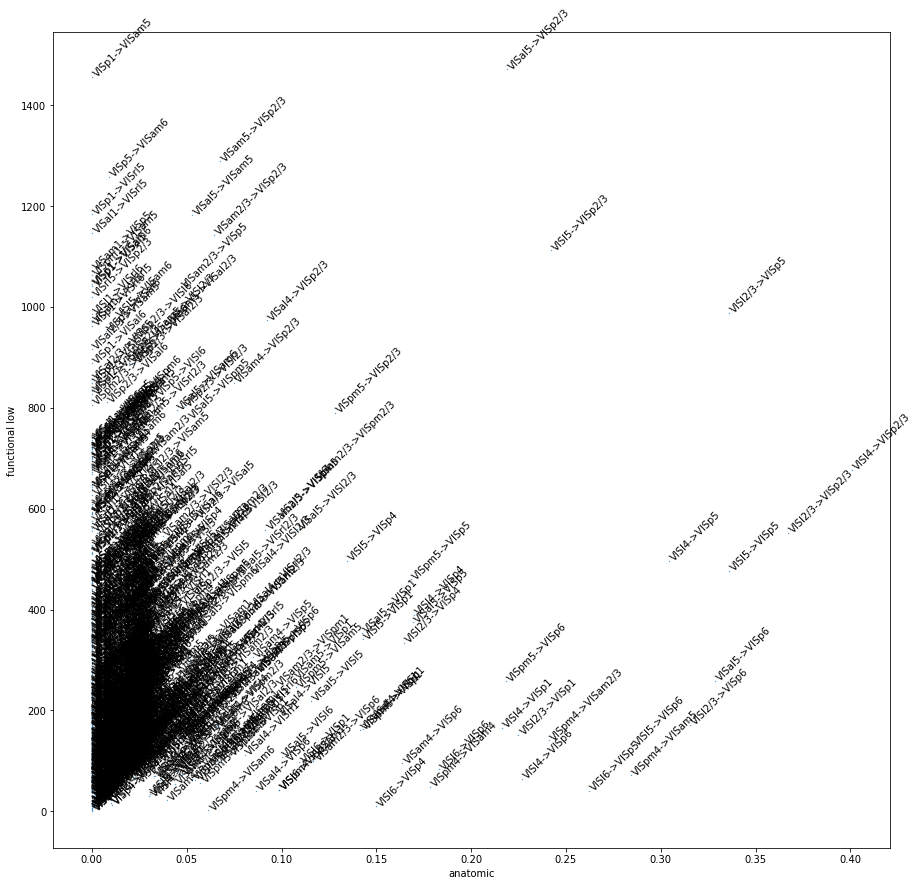

In [18]:
fig, ax = plt.subplots(figsize = (15,15))
ax.scatter(m1[keepinds], m2[keepinds], s = .1)
for i in range(750):
    ax.text(m1[keepinds][i],m2[keepinds][i], cn[keepinds][i], fontdict=  {'fontsize':10, 'rotation':45})#{'fontsize':np.max([m1[keepinds][i],m2[keepinds][i]])})#{'fontsize':m1[keepinds][i]*m2[keepinds][i]/10})
ax.set_xlabel('anatomic')
ax.set_ylabel('functional low')